# Logistic Regression For Gender Voice Recognition 


In [3]:
# Importing Libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot

from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
# Loading the voice dataset
df = pd.read_csv("voice.csv")

In [5]:
# Printing the head rows data
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
# Extracting target class (labels)
y = df.label

# Extracting non-target class (20 classes)
x = df.drop('label', axis = 1)

print('Number of examples in the data:', x.shape)

Number of examples in the data: (3168, 20)


In [7]:
# Relabeling the target classes to 
# male      -->   1
# female    -->   0

df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

# Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Splitting Training and Testing Dataset

In [9]:
#Using the train_test_split to create train and test datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.20,random_state = 42)

# Default Implementation

In [10]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score   :    0.9810725552050473


# Grid Search CV

In [10]:
grid_params =[
    {
        'C':[0.1,10.0,100.0,1000.0],
        'max_iter' : [100,2500,5000]
    }
]

In [11]:
lr = GridSearchCV(LogisticRegression(), grid_params, verbose = True, cv=3, n_jobs = -1)

In [12]:
gs =lr.fit(x_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.4s finished


In [13]:
gs.best_params_

{'C': 10.0, 'max_iter': 100}

In [11]:
lr1 = LogisticRegression(C=10.0,max_iter= 100)
lr1.fit(x_train, y_train)

LogisticRegression(C=10.0)

In [12]:
y_pred1=lr1.predict(x_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(y_test,y_pred1))

Accuracy Score   :    0.9810725552050473


# Confusion Matrix

		Default Model


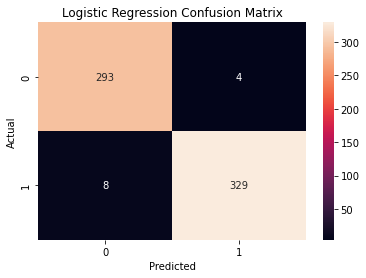

		Model


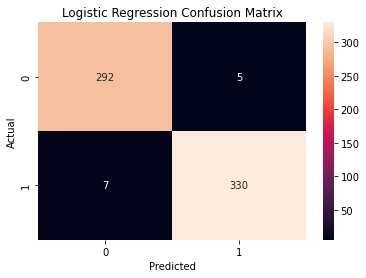

In [13]:
print("\t\tDefault Model")
conf_matrix = confusion_matrix(y_test,y_pred1)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
print("\t\tModel")
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Classification Report

In [14]:

print("Classification Report for Default Model \n\n")
print(classification_report(y_test, y_pred))
print("Classification Report\n\n")
print(classification_report(y_test, y_pred1))


Classification Report for Default Model 


              precision    recall  f1-score   support

      female       0.98      0.98      0.98       297
        male       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Classification Report


              precision    recall  f1-score   support

      female       0.97      0.99      0.98       297
        male       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# Recursive Feature Elimination

In [15]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = lr1,step=1)
rfe.fit(x_train,y_train)
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)

In [17]:
all_features = []
for i in range(20):
    all_features.append(df.columns[i])

In [18]:
selected_features = pd.DataFrame({'Feature':list(all_features),
                         'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
9,sfm,1
13,minfun,1
12,meanfun,1
11,centroid,1
8,sp.ent,1
7,kurt,1
19,modindx,1
5,IQR,1
4,Q75,1
3,Q25,1


In [21]:
lr1.fit(x_train_selected,y_train)
print("Scores After Recursive Feature Elimination:",format(lr1.score(x_test_selected,y_test)))
lr1.fit(x_train,y_train)
print("Scores :",format(lr1.score(x_test,y_test)))

Scores After Recursive Feature Elimination: 0.9810725552050473
Scores : 0.9810725552050473
